# **Multi-Armed Bandit Problem**
This classic RL problem demonstrates the
exploration–exploitation tradeoff dilemma.

Imagine a gambler at a row of slot
machines ("one-armed bandits") deciding
which ones to play, how many times to
play each one and in which order to play
them, and whether to continue with current machine or try different one.

In the problem, each slot machine provides a random reward from a probability distribution specific to that machine, that is not known a priori. The objective of the gambler is to maximize the sum of rewards earned through a sequence of lever pulls.

The crucial tradeoff the gambler faces at each trial is between "exploitation" of the machine that has the highest expected payoff calculated thus far and "exploration" to get more information about the expected payoffs of the other machines in the hope to get even better payoffs. This trade-off between exploration and exploitation is constantly faced in RL.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#
# Define Constants
#
N_ARMS=10 #10 "bandits" in a row
N_STEPS = 10000 #10K steps
N_EPISODES = 1000 # 1000 episodes

# 5 cases based on Task 1:
# a. Epsilon starts at 0.1 with no decay
# b. Epsilon starts at 1.0 with decay rate of 0.9
# c. Epsilon starts at 1.0 with decay rate of 0.99
# d. Epsilon starts at 1.0 with decay rate of 0.999
# e. Epsilon starts at 1.0 with decay rate of 0.9999
cases = {
    'a': {'initial_epsilon': 0.1, 'decay': 1.0},     # no decay
    'b': {'initial_epsilon': 1.0, 'decay': 0.9},
    'c': {'initial_epsilon': 1.0, 'decay': 0.99},
    'd': {'initial_epsilon': 1.0, 'decay': 0.999},
    'e': {'initial_epsilon': 1.0, 'decay': 0.9999}
}

# Dictionary to store average total rewards for each case
results = {}

In [ ]:
#
# Define the Multi-Armed Bandit class
# (1 row of N_ARMS slot machines)
#
class MultiArmedBandit:
    # Initializer
    def __init__(self):
       # probability distribution specific to the N_ARMS slot machine (not known before hand)
       self.probabilities=np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

    # Simulate a single pull of slot machine arm
    # Return 1 (win) with probability of the arm, else 0 (lose)
    def pull(self, arm):
        return 1 if np.random.rand() < self.probabilities[arm] else 0

In [ ]:
#
# Define the Agent using the Epsilon-Greedy strategy with added decay
#
class EpsilonGreedyAgent:
    # Initializer
    def __init__(self, epsilon, decay=1.0):
        self.initial_epsilon = epsilon  # Store initial epsilon for reference
        self.epsilon = epsilon          # Current epsilon value
        self.decay = decay              # Decay factor (1.0 means no decay)
        self.est_returns = np.zeros(N_ARMS)  # Estimated expected returns for each arm
        self.arm_counts = np.zeros(N_ARMS)   # Number of times each arm was pulled
        self.total_rewards = np.zeros(N_ARMS)  # Accumulated rewards per arm

    # Select an arm to pull based on the Epsilon-Greedy strategy
    # by generating a random number to decide whether to explore or exploit
    def select_arm(self):
        # Explore with probability epsilon; else, exploit the best-known arm.
        if np.random.rand() < self.epsilon:
            # Explore: Return a random arm 0 to N_ARMS-1
            return np.random.randint(N_ARMS)
        else:
            # Exploit: pick the arm with the highest estimated return
            return np.argmax(self.est_returns)

    # Update estimated expected returns of an arm
    # (reward is 1 or 0)
    def update(self, arm, reward):
        # Increment the count for the chosen arm
        self.arm_counts[arm] += 1
        # Add the reward to the total rewards for that arm
        self.total_rewards[arm] += reward
        # Update the running average for that arm
        self.est_returns[arm] = self.total_rewards[arm] / self.arm_counts[arm]
        # Decay the epsilon value after each pull
        self.epsilon *= self.decay

**Run Simulation for 1000 Episodes**
<br>(each episode has 10,000 pulls)

Case a: initial_epsilon=0.1, decay=1.0 -> Average Total Reward: 8490.313
Case b: initial_epsilon=1.0, decay=0.9 -> Average Total Reward: 8071.031
Case c: initial_epsilon=1.0, decay=0.99 -> Average Total Reward: 8868.2
Case d: initial_epsilon=1.0, decay=0.999 -> Average Total Reward: 8545.61
Case e: initial_epsilon=1.0, decay=0.9999 -> Average Total Reward: 6155.528

Best configuration: Case c with Average Total Reward: 8868.2


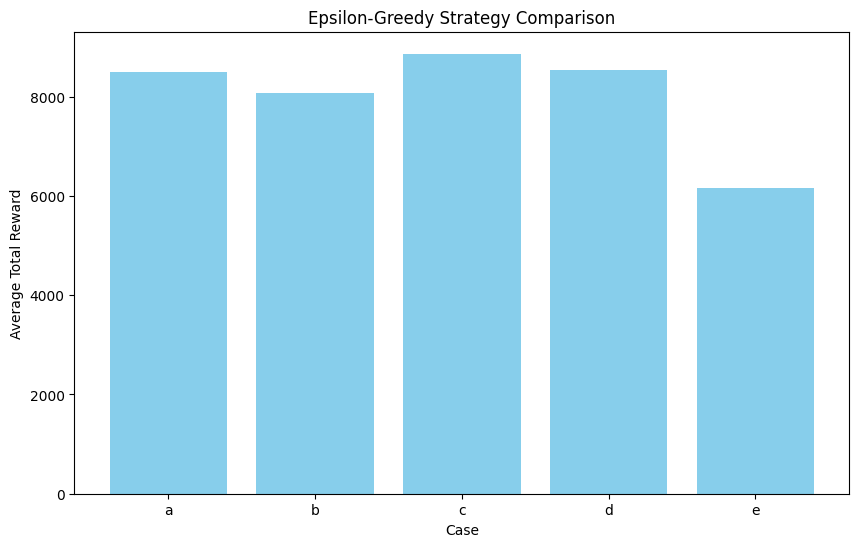

In [ ]:
# ------------------------------------------------------------------
# Run Simulation for Each Configuration
# ------------------------------------------------------------------
# The 'cases' dictionary contains five configurations for the
# epsilon-greedy agent. Each configuration has:
#   - initial_epsilon: The starting exploration rate
#   - decay: The factor by which epsilon is multiplied after each pull
# Iterate over these configurations to compare their performance.
# ------------------------------------------------------------------
for case_key, params in cases.items():
    # Extract parameters from the current configuration
    initial_epsilon = params['initial_epsilon']
    decay = params['decay']

    # This list will store the total reward for each episode (each episode has N_STEPS pulls)
    rewards_per_episode = []

    # --------------------------------------------------------------
    # Run Multiple Episodes for the Current Configuration
    # --------------------------------------------------------------
    for episode in range(N_EPISODES):
        # Initialization
        # Create a new bandit (with 10 arms) for each episode
        bandit = MultiArmedBandit()
        # Create an agent with the specified initial epsilon and decay
        agent = EpsilonGreedyAgent(epsilon=initial_epsilon, decay=decay)

        # Keep track of the total reward gained in this episode
        total_reward = 0

        # ----------------------------------------------------------
        # Iterating N_STEPS Pulls in Each Episode
        # ----------------------------------------------------------
        for step in range(N_STEPS):
            # Agent decides which arm to pull based on its
            # current estimated returns and epsilon value
            arm = agent.select_arm()

            # The bandit returns a reward (1 or 0) for pulling 'arm'
            reward = bandit.pull(arm)

            # Update the agent's knowledge (estimated returns)
            # and decay epsilon if applicable
            agent.update(arm, reward)

            # Accumulate the reward for this episode
            total_reward += reward

        # After finishing all N_STEPS, record the total reward for this episode
        rewards_per_episode.append(total_reward)

    # Compute the average reward across all episodes for this configuration
    avg_reward = np.mean(rewards_per_episode)

    # Store the average reward in the results dictionary using the case key
    results[case_key] = avg_reward

    # Print a summary of the results for this configuration
    print(f"Case {case_key}: initial_epsilon={initial_epsilon}, decay={decay} "
          f"-> Average Total Reward: {avg_reward}")

# ------------------------------------------------------------------
# Identify and Print the Best Configuration
# ------------------------------------------------------------------
# We find the key in 'results' with the highest average reward
best_case = max(results, key=results.get)
print(f"\nBest configuration: Case {best_case} with Average Total Reward: {results[best_case]}")

# ------------------------------------------------------------------
# Plot the Results for Visual Comparison
# ------------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel("Case")
plt.ylabel("Average Total Reward")
plt.title("Epsilon-Greedy Strategy Comparison")
plt.show()
